In [1]:
# Import all the packages

#%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import requests
import json

In [2]:
# Display the data frame

df_by_county = pd.read_csv("statewide_cases.csv")
df_by_county

,county,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,date
0,Santa Clara,151.0,6.0,151,6,2020-03-18
1,Santa Clara,183.0,8.0,32,2,2020-03-19
2,Santa Clara,246.0,8.0,63,0,2020-03-20
3,Santa Clara,269.0,10.0,23,2,2020-03-21
4,Santa Clara,284.0,13.0,15,3,2020-03-22
...,...,...,...,...,...,...
14400,Yolo,3522.0,63.0,30,0,2020-11-09
14401,Yolo,3573.0,64.0,51,1,2020-11-10
14402,Yolo,3606.0,64.0,33,0,2020-11-11
14403,Yolo,3646.0,64.0,40,0,2020-11-12


In [3]:
# Group by on the county name and use .max to show just the totals
# The "newcountconfirmed" column shows the highest single day cases that the county has experienced

df_county = df_by_county.groupby(["county"]).max()
df_county = df_county[["totalcountconfirmed","totalcountdeaths","newcountconfirmed"]]
df_county

,totalcountconfirmed,totalcountdeaths,newcountconfirmed
county,,,
Alameda,25515.0,486.0,540
Alpine,12.0,0.0,3
Amador,397.0,16.0,29
Butte,3402.0,56.0,122
Calaveras,378.0,21.0,43
Colusa,598.0,6.0,36
Contra Costa,20799.0,253.0,558
Del Norte,208.0,1.0,21
El Dorado,1611.0,4.0,40


In [4]:
# Drop the rows that say 'Unassigned' and 'Out of country'

county_df = df_county.drop(["Out Of Country", "Unassigned"])
county_df = county_df.reset_index()
county_df

,county,totalcountconfirmed,totalcountdeaths,newcountconfirmed
0,Alameda,25515.0,486.0,540
1,Alpine,12.0,0.0,3
2,Amador,397.0,16.0,29
3,Butte,3402.0,56.0,122
4,Calaveras,378.0,21.0,43
5,Colusa,598.0,6.0,36
6,Contra Costa,20799.0,253.0,558
7,Del Norte,208.0,1.0,21
8,El Dorado,1611.0,4.0,40
9,Fresno,33693.0,460.0,743


In [5]:
# Use the describe to show initial data of the data frame

county_df.describe()

,totalcountconfirmed,totalcountdeaths,newcountconfirmed
count,58.000000,58.000000,58.000000
mean,17385.706897,314.155172,394.103448
std,45433.948786,982.527707,691.969391
min,11.000000,0.000000,3.000000
25%,667.250000,9.250000,39.250000
50%,3559.000000,46.000000,120.000000
75%,15576.500000,232.750000,513.500000
max,329364.000000,7246.000000,4493.000000


In [6]:
# Create a data frame that shows the total number of cases for each county in the first seven days
# Again drop the rows that say unassigned and out of country

first_seven_df = df_by_county.loc[(df_by_county["date"] == "2020-03-18") | (df_by_county["date"] == "2020-03-19") | (df_by_county["date"] == "2020-03-20") | (df_by_county["date"] == "2020-03-21") | (df_by_county["date"] == "2020-03-22") | (df_by_county["date"] == "2020-03-23") | (df_by_county["date"] == "2020-03-24")]
first_seven_df = first_seven_df.groupby(["county"]).sum()
first_seven_df = first_seven_df[["newcountconfirmed"]]
first_seven_df = first_seven_df.rename(columns={"newcountconfirmed":"Total cases over first 7 days"})
first_seven = first_seven_df.drop(["Unassigned"])
first_seven.head()

,Total cases over first 7 days
county,
Alameda,96
Amador,1
Butte,3
Calaveras,2
Colusa,0


In [7]:
# Create a data frame that shows the total number of cases for each county in the last seven days
# Again drop the rows that say unassigned and out of country

last_seven_df = df_by_county.loc[(df_by_county["date"] == "2020-11-07") | (df_by_county["date"] == "2020-11-08") | (df_by_county["date"] == "2020-11-09") | (df_by_county["date"] == "2020-11-10") | (df_by_county["date"] == "2020-11-11") | (df_by_county["date"] == "2020-11-12") | (df_by_county["date"] == "2020-11-13")]
last_seven_df = last_seven_df.groupby(["county"]).sum()
last_seven_df = last_seven_df[["newcountconfirmed"]]
last_seven_df = last_seven_df.rename(columns={"newcountconfirmed":"Total cases over last 7 days"})
last_seven = last_seven_df.drop(["Out Of Country", "Unassigned"])
last_seven.head()

,Total cases over last 7 days
county,
Alameda,1126
Alpine,6
Amador,28
Butte,148
Calaveras,19


In [8]:
# Merge the two previous tables together on the index 'county' to show the differences in first 7 days and last 7 days

merge_seven_days = pd.merge(first_seven, last_seven, left_index=True, right_index=True)
merge_seven_days

,Total cases over first 7 days,Total cases over last 7 days
county,,
Alameda,96,1126
Amador,1,28
Butte,3,148
Calaveras,2,19
Colusa,0,18
Contra Costa,108,1055
Del Norte,0,14
El Dorado,3,136
Fresno,18,1415


In [9]:
# Use group by on the county data frame by date to show total cases changing over each day

per_day = df_by_county.groupby(["date"]).sum()
per_day

,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths
date,,,,
2020-03-18,675.0,15.0,675,15
2020-03-19,1006.0,18.0,331,3
2020-03-20,1224.0,22.0,218,4
2020-03-21,1468.0,26.0,244,4
2020-03-22,1733.0,35.0,265,9
...,...,...,...,...
2020-11-09,977218.0,18001.0,5367,24
2020-11-10,984682.0,18070.0,7464,69
2020-11-11,991609.0,18108.0,6927,38


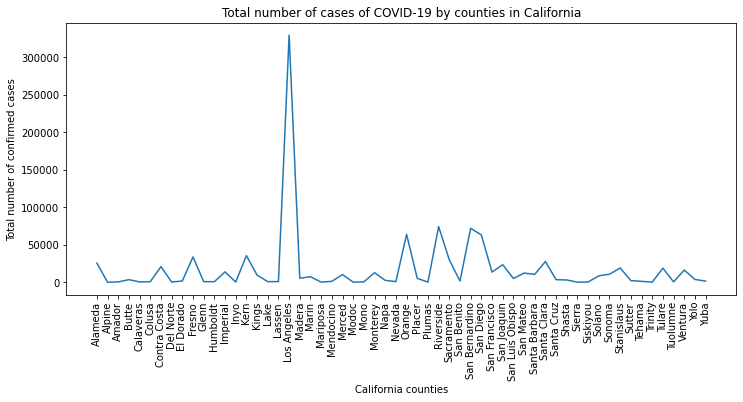

In [12]:
# Create a line plot to show the total confirmed cases

x_values = np.arange(len(county_df["totalcountconfirmed"]))
y_values = county_df["totalcountconfirmed"]
plt.figure(figsize=(12,5))
plt.plot(x_values, y_values)
plt.xlabel("California counties")
plt.ylabel("Total number of confirmed cases")
plt.title("Total number of cases of COVID-19 by counties in California")
plt.xticks(x_values, county_df["county"], rotation=90)
plt.savefig("Total_cases_by_county.png")
plt.show()

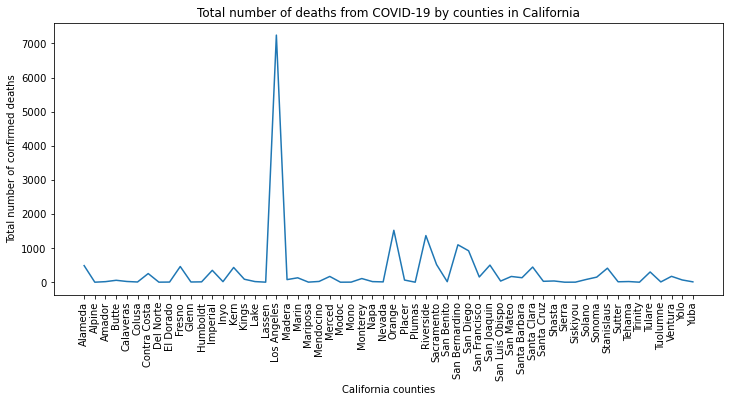

In [13]:
# Create a line plot to show the total confirmed deaths

x_values = np.arange(len(county_df["totalcountdeaths"]))
y_values = county_df["totalcountdeaths"]
plt.figure(figsize=(12,5))
plt.plot(x_values, y_values)
plt.xlabel("California counties")
plt.ylabel("Total number of confirmed deaths")
plt.title("Total number of deaths from COVID-19 by counties in California")
plt.xticks(x_values, county_df["county"], rotation=90)
plt.savefig("Total_deeaths_by_county.png")
plt.show()

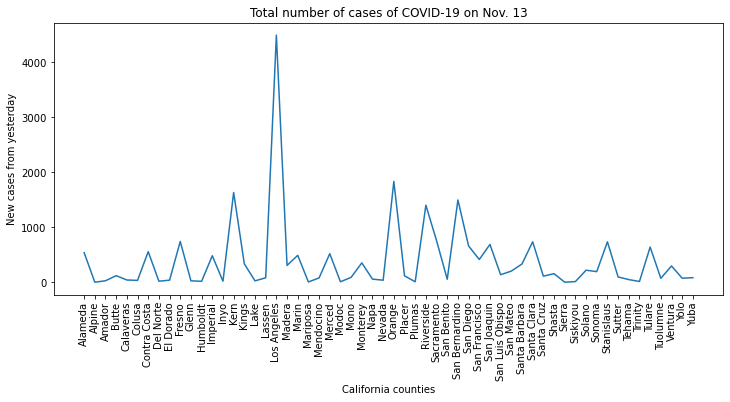

In [14]:
# Create a line plot to show the new counts

x_values = np.arange(len(county_df["newcountconfirmed"]))
y_values = county_df["newcountconfirmed"]
plt.figure(figsize=(12,5))
plt.plot(x_values, y_values)
plt.xlabel("California counties")
plt.ylabel("New cases from yesterday")
plt.title("Total number of cases of COVID-19 on Nov. 13")
plt.xticks(x_values, county_df["county"], rotation=90)
plt.savefig("Total_new_cases_by_county.png")
plt.show()

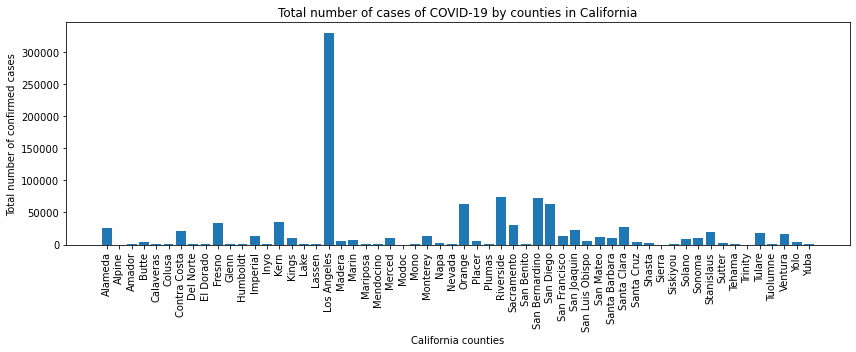

In [15]:
# Create a bar chart to show the total confirmed cases

x_axis = np.arange(len(county_df["totalcountconfirmed"]))
y_axis = county_df["totalcountconfirmed"]
plt.figure(figsize=(12,5))
plt.bar(x_axis, y_axis)
plt.xlabel("California counties")
plt.ylabel("Total number of confirmed cases")
plt.title("Total number of cases of COVID-19 by counties in California")
plt.xticks(x_values, county_df["county"], rotation=90)
plt.savefig("Total_cases_by_county_bar.png")
plt.tight_layout()

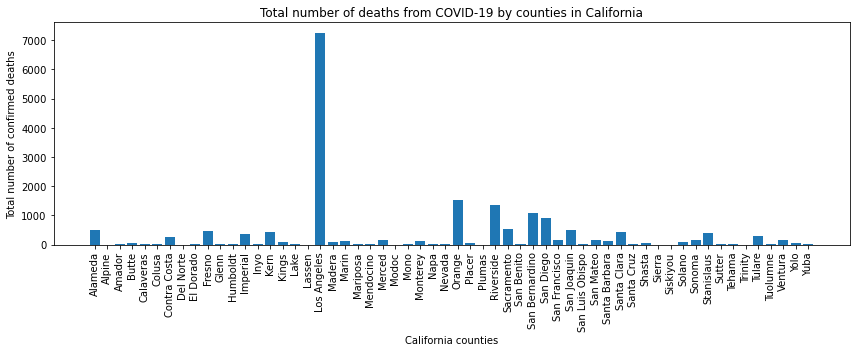

In [16]:
# Create a bar chart to show the total confirmed deaths

x_axis = np.arange(len(county_df["totalcountdeaths"]))
y_axis = county_df["totalcountdeaths"]
plt.figure(figsize=(12,5))
plt.bar(x_axis, y_axis)
plt.xlabel("California counties")
plt.ylabel("Total number of confirmed deaths")
plt.title("Total number of deaths from COVID-19 by counties in California")
plt.xticks(x_values, county_df["county"], rotation=90)
plt.savefig("Total_deaths_by_county_bar.png")
plt.tight_layout()

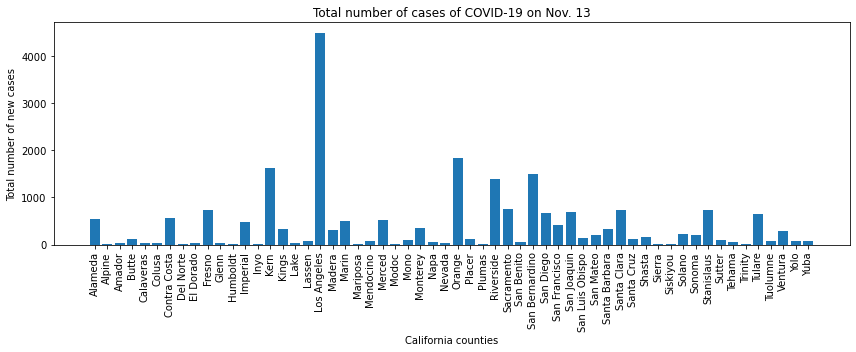

In [17]:
# Create a bar chart to show the new confirmed cases

x_axis = np.arange(len(county_df["newcountconfirmed"]))
y_axis = county_df["newcountconfirmed"]
plt.figure(figsize=(12,5))
plt.bar(x_axis, y_axis)
plt.xlabel("California counties")
plt.ylabel("Total number of new cases")
plt.title("Total number of cases of COVID-19 on Nov. 13")
plt.xticks(x_values, county_df["county"], rotation=90)
plt.savefig("Total_new_cases_by_county_bar.png")
plt.tight_layout()

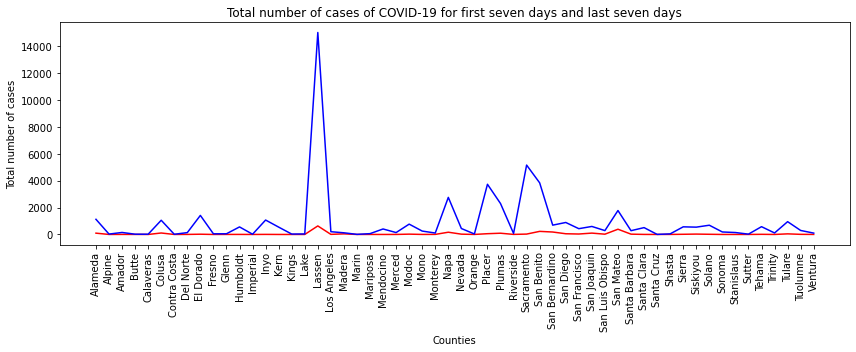

In [18]:
# Create a line plot to show the differences between the first seven days and the last seven days

x_axis = np.arange(len(merge_seven_days["Total cases over first 7 days"]))
first_axis = merge_seven_days["Total cases over first 7 days"]
last_axis = merge_seven_days["Total cases over last 7 days"]
plt.figure(figsize=(12,5))
plt.plot(x_axis, first_axis, color="red")
plt.plot(x_axis, last_axis, color="blue")
plt.xticks(x_axis, county_df["county"], rotation=90)
plt.xlabel("Counties")
plt.ylabel("Total number of cases")
plt.title("Total number of cases of COVID-19 for first seven days and last seven days")
plt.savefig("Total_cases_seven_days.png")
plt.tight_layout()

In [19]:
# Linear regression on the total cases vs total deaths (including LA county)

x_axis = county_df["totalcountconfirmed"]
y_axis = county_df["totalcountdeaths"]
slope, intercept, r_value, p_value, std_err = sts.linregress(x_axis, y_axis)
lin_eq = slope * x_axis + intercept

The correlation coefficient is 0.994.


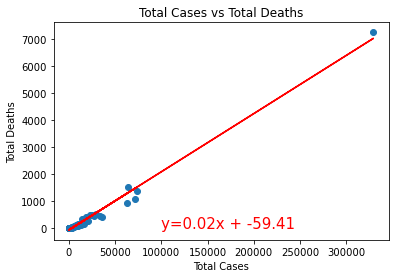

In [20]:
# Create a scatter plot that shows the total cases vs total deaths

x_axis = county_df["totalcountconfirmed"]
y_axis = county_df["totalcountdeaths"]
plt.scatter(x_axis, y_axis, marker="o")
plt.plot(x_axis,lin_eq,"r-")
line_eq = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(100000,5),fontsize=15,color="red")
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.title("Total Cases vs Total Deaths")
print(f"The correlation coefficient is {round(r_value,3)}.")

In [21]:
# Determine the outlier(s) in the data set

total_cases = county_df["totalcountconfirmed"]
quartiles = total_cases.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of COVID-19 cases by county is: {lowerq}")
print(f"The upper quartile of COVID-19 cases by county is: {upperq}")
print(f"The interquartile range of COVID-19 by county cases is: {iqr}")
print(f"The the median of COVID-19 cases by county is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.")
outliers = county_df.loc[county_df["totalcountconfirmed"] >= upper_bound]
outliers

The lower quartile of COVID-19 cases by county is: 667.25
The upper quartile of COVID-19 cases by county is: 15576.5
The interquartile range of COVID-19 by county cases is: 14909.25
The the median of COVID-19 cases by county is: 3559.0 
Values above 37940.375 could be outliers.


,county,totalcountconfirmed,totalcountdeaths,newcountconfirmed
18,Los Angeles,329364.0,7246.0,4493
29,Orange,63804.0,1522.0,1834
32,Riverside,74138.0,1367.0,1402
35,San Bernardino,71895.0,1097.0,1497
36,San Diego,62978.0,921.0,661


In [22]:
# Linear regression on the total cases vs total deaths (excluding outlier counties)

x_axis = county_df.loc[(county_df["county"] != "Los Angeles")]["totalcountconfirmed"]
y_axis = county_df.loc[(county_df["county"] != "Los Angeles")]["totalcountdeaths"]
slope, intercept, r_value, p_value, std_err = sts.linregress(x_axis, y_axis)
lin_eq = slope * x_axis + intercept

The correlation coefficient is 0.97.


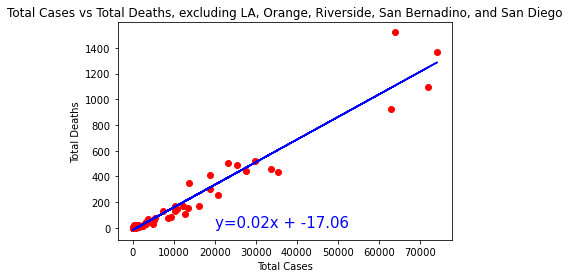

In [23]:
# Create a scatter plot that shows the total cases vs total deaths excluding outliers

x_axis = county_df.loc[(county_df["county"] != "Los Angeles")]["totalcountconfirmed"]
y_axis = county_df.loc[(county_df["county"] != "Los Angeles")]["totalcountdeaths"]
plt.scatter(x_axis, y_axis, marker="o", color="red")
plt.plot(x_axis,lin_eq,"b-")
line_eq = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20000,5),fontsize=15,color="blue")
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.title("Total Cases vs Total Deaths, excluding LA, Orange, Riverside, San Bernadino, and San Diego")
print(f"The correlation coefficient is {round(r_value,3)}.")

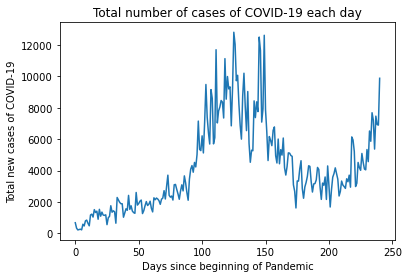

In [24]:
# Create a line plot that shows the new cases each day since the beginning of pandemic

x_axis = np.arange(len(per_day["newcountconfirmed"]))
y_axis = per_day["newcountconfirmed"]
plt.plot(x_axis, y_axis)
plt.xlabel("Days since beginning of Pandemic")
plt.ylabel("Total new cases of COVID-19")
plt.title("Total number of cases of COVID-19 each day")
plt.show()

In [25]:
# Is there a statistical difference on the data that excludes Los Angeles and Los Angeles by itself? In other 
# words, we claim that the data is the same, and there is no difference (LA county accounts for ALL the COVID-19 data)

population1 = per_day["newcountconfirmed"]
print(f"The mean of the first data set is {round(population1.mean(),3)}")
population2 = df_by_county.loc[df_by_county["county"] == "Los Angeles"]["newcountconfirmed"]
print(f"The mean of the first data set is {round(population2.mean(),3)}")
print(f"The null hypothesis is that the means are the same")
print(f"The alternate hypothesis is that the means are different")
print(sts.ttest_ind(population1, population2, equal_var=False))
print(f"We can conclude that the means are different")

The mean of the first data set is 4184.137
The mean of the first data set is 1366.656
The null hypothesis is that the means are the same
The alternate hypothesis is that the means are different
Ttest_indResult(statistic=14.910212580466766, pvalue=1.3812725018033444e-37)
We can conclude that the means are different
